In [1]:
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
ccolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 12})

/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-01-19 11:19:13.142105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 11:19:14.208545: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/tacuevas/miniconda3/envs/tf2/lib/
2024-01-19 11:19:14.208677: W tensorflow/compiler/xla/stream_executor/platform

## NOAA predicted tides

#### Load inputs

In [2]:
pathinData = Path(r'../data/probabilisticPredictions')
inpArray = np.load(pathinData/'tracksNCshortened_with100perturbations_predTides_processed_zeroPadded_scaled.npy')
inpArray.shape
## 7 storms with 100 tracks each

(700, 235, 37)

In [3]:
dfSample = pd.read_csv(r'../models/adcirc/concorde/batch02/_postprocessing/_preprocessForNN/dct_tracksAll_batch02_lengthCorr_tides_resampled_SAMPLE.csv',
                       index_col = 0)

In [4]:
names = ['ISABEL', 'IRENE', 'ARTHUR', 'MATTHEW', 'FLORENCE', 'DORIAN', 'ISAIAS']

In [5]:
dfMea = pd.read_csv(r'../data/probabilisticPredictions/measuredPeakWaterLevel_stormsNC.csv', index_col = 0)
dfMea.head()

,duck,oregon,hatteras,beaufort,wrightsville,wilmington
ISABEL,1.828,1.490,NaN,1.199,NaN,0.969
IRENE,1.053,2.156,1.163,1.371,1.459,0.841
ARTHUR,0.795,1.218,0.609,0.979,1.016,0.833
MATTHEW,1.133,0.906,1.846,1.199,1.464,1.755
FLORENCE,1.299,0.697,0.637,1.681,1.911,1.764


In [6]:
time0 = time.time()
dctPred = {}

st = 'Duck'
modelID = '93ds'

pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
model = tf.keras.models.load_model(pathinModel)

cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
            f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
            'forward_speed_u_fft', 'forward_speed_v_fft']

idx_cols = [list(dfSample).index(x) for x in cols]
inpArray2 = inpArray[:, :, idx_cols]
dfAll = []
for iname, name in enumerate(names):
    pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    df = pd.DataFrame(pred, columns = [name])
    dfAll.append(df)
dfAll = pd.concat(dfAll, axis = 1)
dctPred['Duck'] = dfAll

# st = 'Oregon'
# modelID = '93bs'

# pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
# model = tf.keras.models.load_model(pathinModel)

# cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
#             f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
#             'forward_speed_u_fft', 'forward_speed_v_fft']

# idx_cols = [list(dfSample).index(x) for x in cols]
# inpArray2 = inpArray[:, :, idx_cols]
# dfAll = []
# for iname, name in enumerate(names):
#     pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
#     df = pd.DataFrame(pred, columns = [name])
#     dfAll.append(df)
# dfAll = pd.concat(dfAll, axis = 1)
# dctPred[st] = dfAll

# st = 'Hatteras'
# modelID = '93cs'

# pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
# model = tf.keras.models.load_model(pathinModel)

# cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
#             f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
#             'forward_speed_u_fft', 'forward_speed_v_fft']

# idx_cols = [list(dfSample).index(x) for x in cols]
# inpArray2 = inpArray[:, :, idx_cols]
# dfAll = []
# for iname, name in enumerate(names):
#     pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
#     df = pd.DataFrame(pred, columns = [name])
#     dfAll.append(df)
# dfAll = pd.concat(dfAll, axis = 1)
# dctPred[st] = dfAll

# st = 'Beaufort'
# modelID = '93as'

# pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
# model = tf.keras.models.load_model(pathinModel)

# cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
#             f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
#             'forward_speed_u_fft', 'forward_speed_v_fft']

# idx_cols = [list(dfSample).index(x) for x in cols]
# inpArray2 = inpArray[:, :, idx_cols]
# dfAll = []
# for iname, name in enumerate(names):
#     pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
#     df = pd.DataFrame(pred, columns = [name])
#     dfAll.append(df)
# dfAll = pd.concat(dfAll, axis = 1)
# dctPred[st] = dfAll

# st = 'Wilmington'
# modelID = '93es'

# pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
# model = tf.keras.models.load_model(pathinModel)

# cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
#             f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
#             'forward_speed_u_fft', 'forward_speed_v_fft']

# idx_cols = [list(dfSample).index(x) for x in cols]
# inpArray2 = inpArray[:, :, idx_cols]
# dfAll = []
# for iname, name in enumerate(names):
#     pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
#     df = pd.DataFrame(pred, columns = [name])
#     dfAll.append(df)
# dfAll = pd.concat(dfAll, axis = 1)
# dctPred[st] = dfAll

st = 'Wrightsville'
modelID = '93fs'

pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
model = tf.keras.models.load_model(pathinModel)

cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
            f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
            'forward_speed_u_fft', 'forward_speed_v_fft']

idx_cols = [list(dfSample).index(x) for x in cols]
inpArray2 = inpArray[:, :, idx_cols]
dfAll = []
for iname, name in enumerate(names):
    pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    df = pd.DataFrame(pred, columns = [name])
    dfAll.append(df)
dfAll = pd.concat(dfAll, axis = 1)
dctPred[st] = dfAll

print((time.time() - time0))


# fig, ax = plt.subplots(figsize = (6, 6))
# for icol, col in enumerate(dfAll.columns):
#     ax.scatter([dfMea.loc[col, st.lower()]]*99, dfAll[col].iloc[1:], color = ccolors[icol], alpha = 0.1)
#     ax.scatter([dfMea.loc[col, st.lower()]], [dfAll.loc[0, col]], color = ccolors[icol], alpha = 1, edgecolors='k', label = col, s = 50)
# ax.plot(np.arange(0.6, 2.2, 0.2), np.arange(0.6, 2.2, 0.2), ls = '--', color = 'k')
# ax.set_xlabel('Measured Peak Total Water Level [mMSL]')
# ax.set_ylabel('Predicted Peak Total Water Level [mMSL]')
# ax.legend(frameon = True)
# # ax.set_ylim([0, 3])



2024-01-19 11:19:32.131248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 11:19:33.691280: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 71 MB memory:  -> device: 0, name: Quadro P2000, pci bus id: 0000:5b:00.0, compute capability: 6.1
2024-01-19 11:19:33.692272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 3076 MB memory:  -> device: 1, name: Quadro P2000, pci bus id: 0000:9e:00.0, compute capability: 6.1
2024-01-19 11:19:33.737066: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:735] failed to allocate 71.50M (74973184 bytes) from device:

UnimplementedError: Graph execution error:

Detected at node 'sequential/conv1d/Conv1D' defined at (most recent call last):
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance
      app.start()
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_13228/535949271.py", line 18, in <module>
      pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/tacuevas/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv1d/Conv1D'
DNN library is not found.
	 [[{{node sequential/conv1d/Conv1D}}]] [Op:__inference_predict_function_2953]

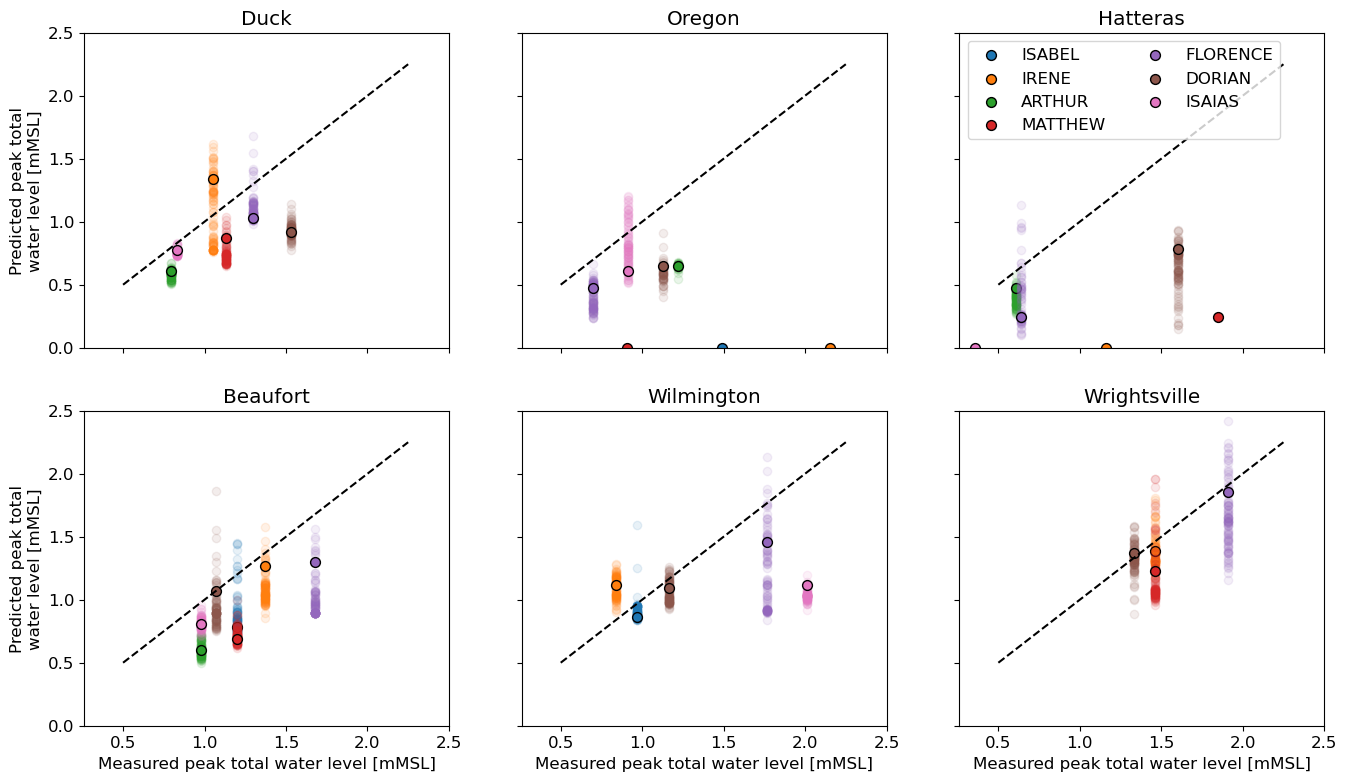

In [23]:
fig, ax = plt.subplots(figsize = (16, 9), nrows = 2, ncols = 3, sharex = True, sharey = True)
for ik, k in enumerate(dctPred.keys()):
    axi = ax.flatten()[ik]

    dfAll = dctPred[k]

    for icol, col in enumerate(dfAll.columns):
        axi.scatter([dfMea.loc[col, k.lower()]]*99, dfAll[col].iloc[1:], color = ccolors[icol], alpha = 0.1)
        axi.scatter([dfMea.loc[col, k.lower()]], [dfAll.loc[0, col]], color = ccolors[icol], alpha = 1, edgecolors='k', label = col, s = 50)
    
    axi.plot(np.arange(0.5, 2.5, 0.25), np.arange(0.5, 2.5, 0.25), ls = '--', color = 'k')
    axi.set_xticks(np.arange(0.5, 3, 0.5))
    axi.set_title(k)
    axi.set_yticks(np.arange(0.0, 3, 0.5))
    axi.set_ylim([0.0, 2.5])

ax[1, 0].set_xlabel('Measured peak total water level [mMSL]')
ax[1, 1].set_xlabel('Measured peak total water level [mMSL]')
ax[1, 2].set_xlabel('Measured peak total water level [mMSL]')
ax[0, 0].set_ylabel('Predicted peak total\nwater level [mMSL]')
ax[1, 0].set_ylabel('Predicted peak total\nwater level [mMSL]')
ax[0, 2].legend(frameon = True, ncol=2)

# fig.savefig(r'../documents/thesis/prob_predict')

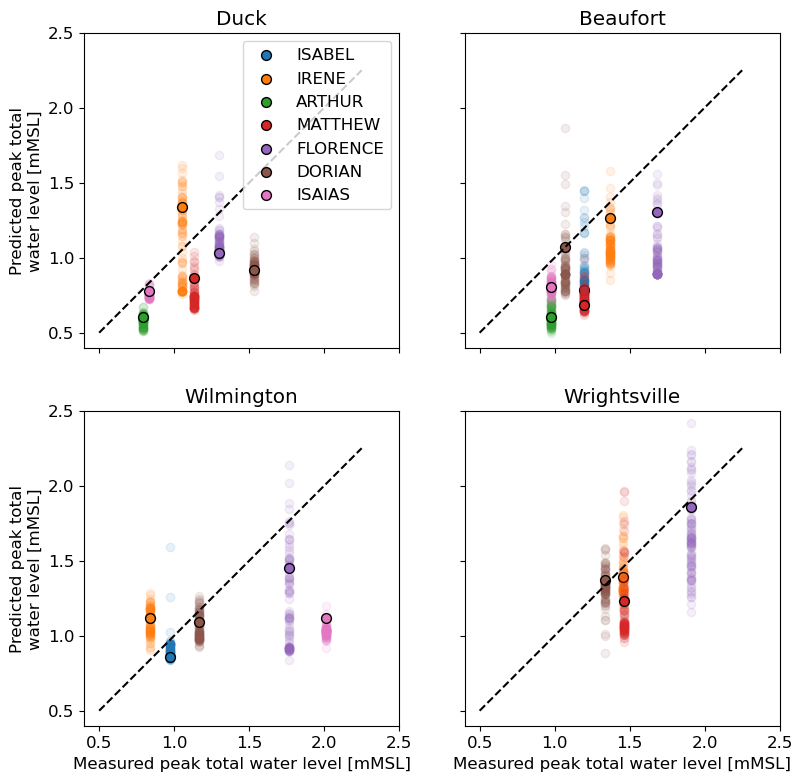

In [39]:
fig, ax = plt.subplots(figsize = (9, 9), nrows = 2, ncols = 2, sharex = True, sharey = True)
ik = 0
for k in dctPred.keys():

    if k in ['Hatteras', 'Oregon']:
        pass
    else:
        axi = ax.flatten()[ik]

        dfAll = dctPred[k]

        for icol, col in enumerate(dfAll.columns):
            axi.scatter([dfMea.loc[col, k.lower()]]*99, dfAll[col].iloc[1:], color = ccolors[icol], alpha = 0.1)
            axi.scatter([dfMea.loc[col, k.lower()]], [dfAll.loc[0, col]], color = ccolors[icol], alpha = 1, edgecolors='k', label = col, s = 50)
        
        axi.plot(np.arange(0.5, 2.5, 0.25), np.arange(0.5, 2.5, 0.25), ls = '--', color = 'k')
        axi.set_xticks(np.arange(0.50, 3, 0.5))
        axi.set_title(k)
        axi.set_yticks(np.arange(0.50, 3, 0.5))
        axi.set_ylim([0.4, 2.5])
        axi.set_xlim([0.4, 2.5])
        axi.set_aspect('equal')
        ik+=1

ax[1, 0].set_xlabel('Measured peak total water level [mMSL]')
ax[1, 1].set_xlabel('Measured peak total water level [mMSL]')
# ax[1, 2].set_xlabel('Measured peak total water level [mMSL]')
ax[0, 0].set_ylabel('Predicted peak total\nwater level [mMSL]')
ax[1, 0].set_ylabel('Predicted peak total\nwater level [mMSL]')
ax[0, 0].legend(frameon = True, ncol=1)

In [18]:
dctPred.keys()

dict_keys(['Duck', 'Oregon', 'Hatteras', 'Beaufort', 'Wilmington', 'Wrightsville'])

In [20]:
dfAll.columns

Index(['ISABEL', 'IRENE', 'ARTHUR', 'MATTHEW', 'FLORENCE', 'DORIAN', 'ISAIAS'], dtype='object')

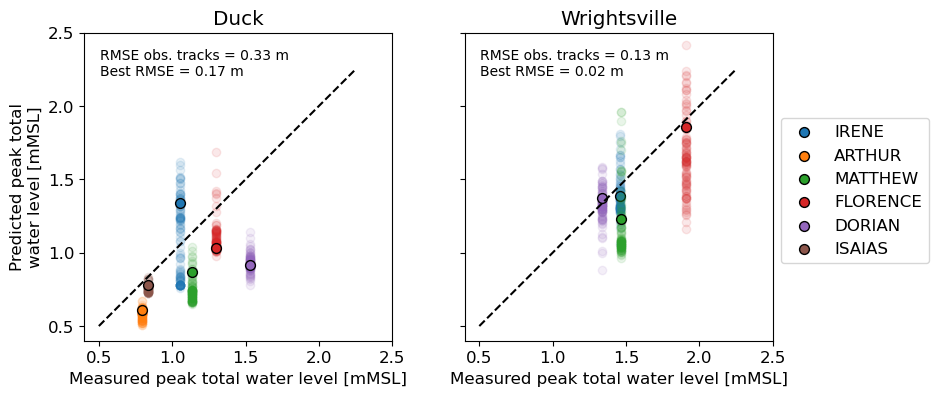

In [7]:
dctBias = {}
fig, ax = plt.subplots(figsize = (9, 4), nrows = 1, ncols = 2, sharex = True, sharey = True)
# fig1, ax1 = plt.subplots(figsize = (9, 4), nrows = 1, ncols = 2, sharex = True, sharey = True)

ik = 0
for k in dctPred.keys():

    if k in ['Hatteras', 'Oregon', 'Wilmington', 'Beaufort']:
        pass
    else:
        axi = ax.flatten()[ik]

        dfAll = dctPred[k]

        for icol, col in enumerate(dfAll.columns[1:]):
            axi.scatter([dfMea.loc[col, k.lower()]]*99, dfAll[col].iloc[1:], color = ccolors[icol], alpha = 0.1)
            axi.scatter([dfMea.loc[col, k.lower()]], [dfAll.loc[0, col]], color = ccolors[icol], alpha = 1, edgecolors='k', label = col, s = 50)
        
        axi.plot(np.arange(0.5, 2.5, 0.25), np.arange(0.5, 2.5, 0.25), ls = '--', color = 'k')
        axi.set_xticks(np.arange(0.50, 3, 0.5))
        axi.set_title(k)
        axi.set_yticks(np.arange(0.50, 3, 0.5))
        axi.set_ylim([0.4, 2.5])
        axi.set_xlim([0.4, 2.5])
        axi.set_aspect('equal')
  

        # aux = dfAll.iloc[[0],:]
        # aux1 = aux[aux < 10].dropna(axis = 1)
        # aux2 = dfMea.loc[aux1.columns, [k.lower()]].dropna()
        # aux3 = aux1.loc[:, aux2.index]
        # rmse = np.sqrt(mean_squared_error(aux2.values.reshape(-1), aux3.values.reshape(-1)))
        # # print(f'{k}: {rmse:0.2f} m')
        aux1 = dfAll[dfAll < 10].dropna(axis = 1)
        aux2 = dfMea.loc[aux1.columns, [k.lower()]].dropna().T
        aux3 = aux1.loc[:, aux2.columns]
        rmse = np.sqrt(mean_squared_error(aux2, aux3.iloc[[0], :]))
        
        dctBias[k] = np.abs(aux3 - aux2.values)
        bestpreds = np.diagonal(aux3.iloc[np.abs(aux3 - aux2.values).idxmin().values, :].values)
        bestrmse = np.sqrt(mean_squared_error(aux2.values.reshape(-1), bestpreds))
        
        axi.text(0.05, 0.95, f'RMSE obs. tracks = {rmse:0.2f} m\nBest RMSE = {bestrmse:0.2f} m', transform=axi.transAxes, fontsize=10,
                verticalalignment='top', color = 'k')
        
        # sns.kdeplot(aux3, ax = ax1[ik])
        # ax1
        # for a, b in enumerate(aux2.columns):
            # ax1[icol].axvline(x = aux2.loc[k.lower(), col], color = ccolors[a], ls = '--')
        # rmse_list = []
        # for i in aux3.index:
        #     rmse_list.append(np.sqrt(mean_squared_error(aux2, aux3.iloc[[0], :])))

        

        # nBest RMSE = {min(rmse_list):0.2f} m
        ik+=1


ax[0].set_xlabel('Measured peak total water level [mMSL]')
ax[1].set_xlabel('Measured peak total water level [mMSL]')
# # ax[1, 2].set_xlabel('Measured peak total water level [mMSL]')
ax[0].set_ylabel('Predicted peak total\nwater level [mMSL]')
# ax[1, 0].set_ylabel('Predicted peak total\nwater level [mMSL]')
ax[1].legend(frameon = True, ncol=1, bbox_to_anchor=(1, 0.75))
fig.savefig(r'../documents/thesis/prob_prediction_open_ocean.png', dpi = 300, bbox_inches = 'tight')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

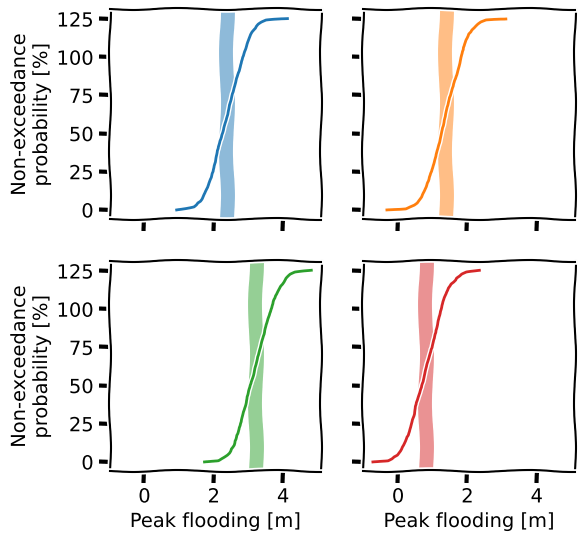

In [35]:
with plt.xkcd():
    probs = np.arange(0, 1.01, 0.01)
    fig, ax = plt.subplots(figsize = (6, 6), nrows=2, ncols=2, sharex=True, sharey=True)
    for i, j in enumerate([2.4, 1.4, 3.2, 0.8]):
        axi = ax.flatten()[i]
        aux = np.random.normal(j, 0.5, 1000)
        qs = np.quantile(aux, probs)
        axi.axvline(aux.mean(), lw = 10, color = ccolors[i], alpha = 0.5)
        axi.plot(qs, probs, color = ccolors[i])
        axi.set_yticklabels([f'{100*x:0.0f}' for x in axi.get_yticks()])

    # ax[0, 0].xaxis.tick_top()
    # ax[0, 0].xaxis.set_label_position('top')
    # ax[0, 1].xaxis.tick_top()
    # ax[0, 1].xaxis.set_label_position('top')
    ax[1, 0].set_xlabel('Peak flooding [m]')
    ax[1, 1].set_xlabel('Peak flooding [m]')
    ax[0, 0].set_ylabel('Non-exceedance\nprobability [%]')
    ax[1, 0].set_ylabel('Non-exceedance\nprobability [%]')
fig.savefig(r'../documents/thesis/prob_prediction_dummy.png', dpi = 300, bbox_inches = 'tight')

In [11]:
from scipy import interpolate

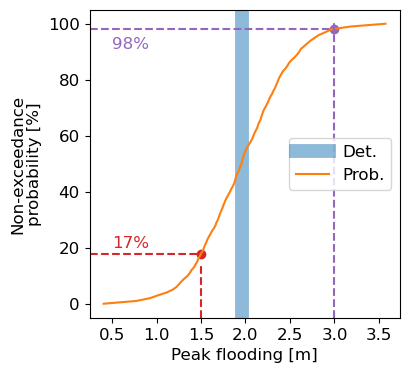

In [62]:
# with plt.xkcd():
probs = np.arange(0, 1.01, 0.01)
fig, ax = plt.subplots(figsize = (4, 4), nrows=1, ncols=1, sharex=True, sharey=True)
# for i, j in enumerate([2.4, 1.4, 3.2, 0.8]):
# axi = ax.flatten()[i]
aux = np.random.normal(2, 0.5, 1000)
qs = np.quantile(aux, probs)
ax.axvline(aux.mean(), lw = 10, color = ccolors[0], alpha = 0.5, label = 'Det.')
ax.plot(qs, probs, color = ccolors[1], label = 'Prob.')
ax.set_yticklabels([f'{100*x:0.0f}' for x in ax.get_yticks()[:-1]])
ax.legend(frameon = True, loc = 'center right')
ax.set_xticks(np.arange(0, 4, 0.5))

f = interpolate.interp1d(qs, probs)
a = 1.5
b = 3
pa = f(a)
pb = f(b)

ax.axvline(x = a, ymin = 0, ymax = float(pa), color = ccolors[3], ls = '--', lw = 1.5)
ax.axhline(y = float(pa), xmin = 0, xmax = 0.35, color = ccolors[3], ls = '--', lw = 1.5)
ax.scatter([a], [pa], color = ccolors[3])

ax.scatter([b], [pb], color = ccolors[4])
ax.axvline(x = b, ymin = 0, ymax = float(pb)-0.02, color = ccolors[4], ls = '--', lw = 1.5)
ax.axhline(y = float(pb), xmin = 0, xmax = 0.78, color = ccolors[4], ls = '--', lw = 1.5)

ax.text(0.5, pa+0.02, f'{int(pa*100)}%', size = 12, color = ccolors[3])
ax.text(0.5, pb-0.07, f'{int(pb*100)}%', size = 12, color = ccolors[4])

# ax[0, 0].xaxis.tick_top()
# ax[0, 0].xaxis.set_label_position('top')
# ax[0, 1].xaxis.tick_top()
# ax[0, 1].xaxis.set_label_position('top')
ax.set_xlabel('Peak flooding [m]')
#     ax[1, 1].set_xlabel('Peak flooding [m]')
ax.set_ylabel('Non-exceedance\nprobability [%]')
#     ax[1, 0].set_ylabel('Non-exceedance\nprobability [%]')
fig.savefig(r'../documents/thesis/prob_prediction_dummy_single.png', dpi = 300, bbox_inches = 'tight')

1.5

In [17]:
p3

array(0.97207297)

In [27]:
import scipy.stats as stats

In [79]:
ik = 0
for k in dctPred.keys():

    if k in ['Hatteras', 'Oregon', 'Wilmington', 'Beaufort']:
        pass
    else:
        print(f'{k}')
        axi = ax.flatten()[ik]
        dfAll = dctPred[k]
        aux1 = dfAll[dfAll < 10].dropna(axis = 1)
        aux2 = dfMea.loc[aux1.columns, [k.lower()]].dropna().T
        aux3 = aux1.loc[:, aux2.columns]

        for col in aux3.columns:
            print(f'    {col}')
            mean = aux3.loc[:, col].mean()
            std_dev = aux3.loc[:,col].std()
            for prob in np.arange(0.5, 1, 0.001):
                z_score = stats.norm.ppf(prob)
                upper_bound = mean + z_score * std_dev
                lower_bound = mean - z_score * std_dev
                if lower_bound <= aux2.loc[k.lower(), col] <= upper_bound:
                    print(f'        {prob}')
                    break
                else:
                    pass

Duck
    IRENE
        0.553
    ARTHUR
    MATTHEW
    FLORENCE
        0.9580000000000004
    DORIAN
    ISAIAS
        0.9980000000000004
Wrightsville
    IRENE
        0.7120000000000002
    MATTHEW
        0.9070000000000004
    FLORENCE
        0.8310000000000003
    DORIAN
        0.525


## Tides from ADCIRC simulations

In [10]:
pathinData = Path(r'../data/probabilisticPredictions')
inpArray = np.load(pathinData/'tracksNCshortened_with100perturbations_ADCIRCTides_processed_zeroPadded_scaled.npy')
inpArray.shape
## 7 storms with 100 tracks each

(700, 235, 37)

In [11]:
dfSample = pd.read_csv(r'../models/adcirc/concorde/batch02/_postprocessing/_preprocessForNN/dct_tracksAll_batch02_lengthCorr_tides_resampled_SAMPLE.csv',
                       index_col = 0)
names = ['ISABEL', 'IRENE', 'ARTHUR', 'MATTHEW', 'FLORENCE', 'DORIAN', 'ISAIAS']
dfHind = pd.read_csv(r'../models/adcirc/concorde/batch02/_postprocessing/max_water_level_at_NC_NOAA_stations_historic_storms.csv',
                     index_col = 0)

In [13]:
dctPred = {}

st = 'Duck'
modelID = '93ds'

pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
model = tf.keras.models.load_model(pathinModel)

cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
            f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
            'forward_speed_u_fft', 'forward_speed_v_fft']

idx_cols = [list(dfSample).index(x) for x in cols]
inpArray2 = inpArray[:, :, idx_cols]
dfAll = []
for iname, name in enumerate(names):
    pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    df = pd.DataFrame(pred, columns = [name])
    dfAll.append(df)
dfAll = pd.concat(dfAll, axis = 1)
dctPred['Duck'] = dfAll

st = 'Oregon'
modelID = '93bs'

pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
model = tf.keras.models.load_model(pathinModel)

cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
            f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
            'forward_speed_u_fft', 'forward_speed_v_fft']

idx_cols = [list(dfSample).index(x) for x in cols]
inpArray2 = inpArray[:, :, idx_cols]
dfAll = []
for iname, name in enumerate(names):
    pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    df = pd.DataFrame(pred, columns = [name])
    dfAll.append(df)
dfAll = pd.concat(dfAll, axis = 1)
dctPred[st] = dfAll

st = 'Hatteras'
modelID = '93cs'

pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
model = tf.keras.models.load_model(pathinModel)

cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
            f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
            'forward_speed_u_fft', 'forward_speed_v_fft']

idx_cols = [list(dfSample).index(x) for x in cols]
inpArray2 = inpArray[:, :, idx_cols]
dfAll = []
for iname, name in enumerate(names):
    pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    df = pd.DataFrame(pred, columns = [name])
    dfAll.append(df)
dfAll = pd.concat(dfAll, axis = 1)
dctPred[st] = dfAll

st = 'Beaufort'
modelID = '93as'

pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
model = tf.keras.models.load_model(pathinModel)

cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
            f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
            'forward_speed_u_fft', 'forward_speed_v_fft']

idx_cols = [list(dfSample).index(x) for x in cols]
inpArray2 = inpArray[:, :, idx_cols]
dfAll = []
for iname, name in enumerate(names):
    pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    df = pd.DataFrame(pred, columns = [name])
    dfAll.append(df)
dfAll = pd.concat(dfAll, axis = 1)
dctPred[st] = dfAll

st = 'Wilmington'
modelID = '93es'

pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
model = tf.keras.models.load_model(pathinModel)

cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
            f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
            'forward_speed_u_fft', 'forward_speed_v_fft']

idx_cols = [list(dfSample).index(x) for x in cols]
inpArray2 = inpArray[:, :, idx_cols]
dfAll = []
for iname, name in enumerate(names):
    pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    df = pd.DataFrame(pred, columns = [name])
    dfAll.append(df)
dfAll = pd.concat(dfAll, axis = 1)
dctPred[st] = dfAll

st = 'Wrightsville'
modelID = '93fs'

pathinModel = Path(f'../models/NNmodel/1DCNN_final_architecture/fftAndLocalTides/{modelID}/bestModel_{modelID}_nonVal_{st}.tf')
model = tf.keras.models.load_model(pathinModel)

cols = ['wind_speed', 'pressure', 'rad_to_max_ws', 'forward_speed_u', 'forward_speed_v',
            f'dist_to_{st.lower()}', f'{st}', 'wind_speed_fft', 'pressure_fft', 'rad_to_max_ws_fft',
            'forward_speed_u_fft', 'forward_speed_v_fft']

idx_cols = [list(dfSample).index(x) for x in cols]
inpArray2 = inpArray[:, :, idx_cols]
dfAll = []
for iname, name in enumerate(names):
    pred = model.predict(inpArray2[iname*100:(iname+1)*100, :, :]).reshape(-1)
    df = pd.DataFrame(pred, columns = [name])
    dfAll.append(df)
dfAll = pd.concat(dfAll, axis = 1)
dctPred[st] = dfAll


# fig, ax = plt.subplots(figsize = (6, 6))
# for icol, col in enumerate(dfAll.columns):
#     ax.scatter([dfMea.loc[col, st.lower()]]*99, dfAll[col].iloc[1:], color = ccolors[icol], alpha = 0.1)
#     ax.scatter([dfMea.loc[col, st.lower()]], [dfAll.loc[0, col]], color = ccolors[icol], alpha = 1, edgecolors='k', label = col, s = 50)
# ax.plot(np.arange(0.6, 2.2, 0.2), np.arange(0.6, 2.2, 0.2), ls = '--', color = 'k')
# ax.set_xlabel('Measured Peak Total Water Level [mMSL]')
# ax.set_ylabel('Predicted Peak Total Water Level [mMSL]')
# ax.legend(frameon = True)
# # ax.set_ylim([0, 3])



4/4 [==============================] - 0s 5ms/step


In [14]:
dfHind.head()

,Duck,Oregon,Hatteras,Beaufort,Wilmington,Wrightsville
Arthur,1.509867,0.911798,1.497667,2.129577,0.749290,2.232792
Florence,0.859692,0.482091,0.240263,1.879700,3.282063,1.981187
Irene,1.094560,2.962294,1.112271,2.282573,0.808168,3.514507
Isaias,0.850690,1.246958,0.204605,1.887169,2.515477,1.581546
Isabel,1.318409,0.347550,0.172327,1.574595,0.845429,0.996678


In [16]:
dfAll

,ISABEL,IRENE,ARTHUR,MATTHEW,FLORENCE,DORIAN,ISAIAS
0,1.172570,1.389396,98.594604,1.230646,1.858779,1.370363,281.112915
1,1.719844,1.381255,98.348694,1.054841,1.372121,1.343419,281.114990
2,1.206536,1.314985,98.864662,1.008144,1.367238,1.406004,280.203094
3,1.275784,1.357562,98.328506,1.034396,1.424889,1.286761,281.091217
4,1.205745,1.300283,98.956116,1.048298,1.290434,1.287985,280.772522
...,...,...,...,...,...,...,...
95,1.068546,1.297495,99.027443,1.895898,1.710537,1.328316,281.261780
96,1.117311,1.373652,98.520218,1.421451,2.417320,1.204934,280.736542
97,1.063152,1.429074,98.700356,1.014378,1.936066,1.300246,280.773834
98,1.175351,1.316501,98.289772,1.524754,1.277722,1.577896,280.259857


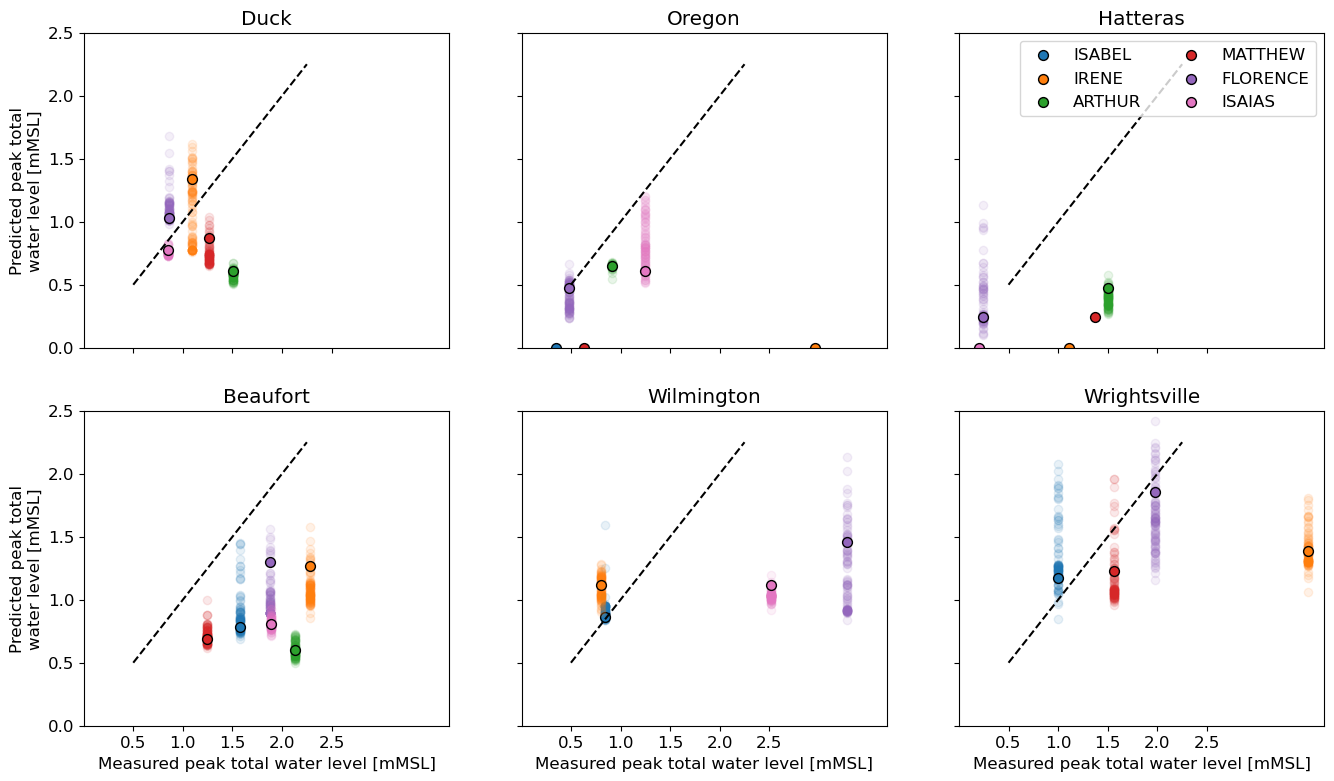

In [21]:
fig, ax = plt.subplots(figsize = (16, 9), nrows = 2, ncols = 3, sharex = True, sharey = True)
for ik, k in enumerate(dctPred.keys()):
    axi = ax.flatten()[ik]

    dfAll = dctPred[k]

    for icol, col in enumerate(dfAll.columns):
        try:
            axi.scatter([dfHind.loc[col.capitalize(), k]]*99, dfAll[col.upper()].iloc[1:], 
                        color = ccolors[icol], alpha = 0.1)
            axi.scatter([dfHind.loc[col.capitalize(), k]], [dfAll.loc[0, col.upper()]], 
                        color = ccolors[icol], alpha = 1, edgecolors='k', label = col, s = 50)
        except:
            pass
    
    axi.plot(np.arange(0.5, 2.5, 0.25), np.arange(0.5, 2.5, 0.25), ls = '--', color = 'k')
    axi.set_xticks(np.arange(0.5, 3, 0.5))
    axi.set_title(k)
    axi.set_yticks(np.arange(0.0, 3, 0.5))
    axi.set_ylim([0.0, 2.5])

ax[1, 0].set_xlabel('Measured peak total water level [mMSL]')
ax[1, 1].set_xlabel('Measured peak total water level [mMSL]')
ax[1, 2].set_xlabel('Measured peak total water level [mMSL]')
ax[0, 0].set_ylabel('Predicted peak total\nwater level [mMSL]')
ax[1, 0].set_ylabel('Predicted peak total\nwater level [mMSL]')
ax[0, 2].legend(frameon = True, ncol=2)